In [38]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [82]:
def gradiente(A,x0,b, tol=1e-10):
    x = x0.copy()
    k = 0
    r = b - A @ x0
    su = [x]
    res = [r]
    while np.linalg.norm(x) > tol and k <= 500:
        alpha = (r @ r) / (r @ A @ r)
        x = x +  alpha * r
        r = b - A @ x
        su.append(x)
        res.append(r) 
        k = k + 1 
    #DIBUJO
    nres = [np.linalg.norm(resv) for resv in res]
    iteraciones = np.arange(len(nres))
    plt.scatter(iteraciones, nres, color='b', alpha=0.7)
    plt.title('Evolución de los residuos')
    plt.xlabel('Iteración')
    plt.ylabel('Norma del residuo')
    plt.grid(True, linestyle='--', alpha=0.3,color = 'y')
    plt.show()
    return su, res

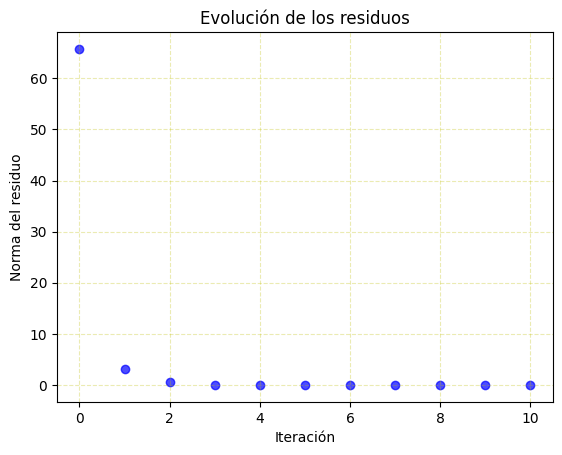

In [83]:
B = np.array([[4,1],[1,3]])
A = B @ B
b = np.array([3,1])
x0 = np.array([0,0])
s,r = gradiente( A , b , x0 )

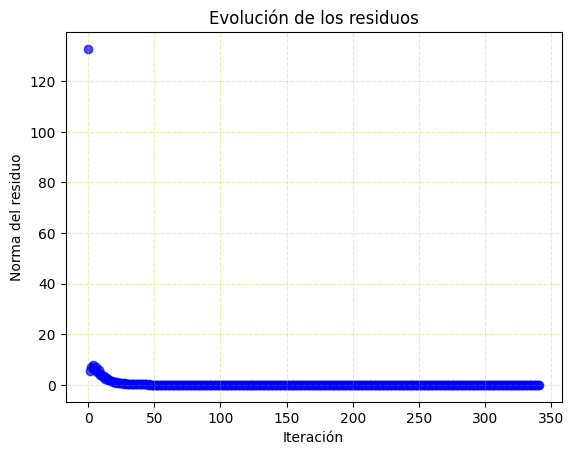

In [84]:
#XK, RK
B = np.array([[1,0,0,0],[0,2,3,4],[0,1,0,0],[2,3,4,0]])
A = B @ B
b = np.array([3,1,2,3])
x0 = np.array([0,0,0,0])
x,r = gradiente( A , b , x0 )


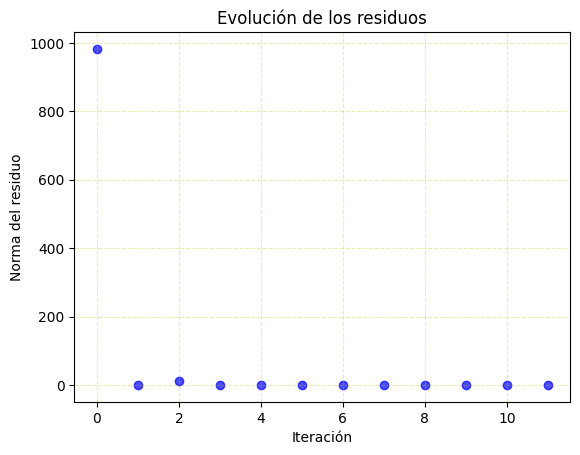

Iteracion: 0 		 Vector: [1 2 3] 		 Norma diferencia:  982.1690
Iteracion: 1 		 Vector: [ 0.12228928  0.01360206 -0.09508516] 		 Norma diferencia:  0.1866
Iteracion: 2 		 Vector: [-0.01131477 -0.02262954 -0.03394432] 		 Norma diferencia:  11.1130
Iteracion: 3 		 Vector: [-0.00138368 -0.0001539   0.00107587] 		 Norma diferencia:  0.0021
Iteracion: 4 		 Vector: [0.00012802 0.00025605 0.00038407] 		 Norma diferencia:  0.1257
Iteracion: 5 		 Vector: [ 1.56559712e-05  1.74139159e-06 -1.21731880e-05] 		 Norma diferencia:  0.0000
Iteracion: 6 		 Vector: [-1.44856309e-06 -2.89712617e-06 -4.34568926e-06] 		 Norma diferencia:  0.0014
Iteracion: 7 		 Vector: [-1.77143743e-07 -1.97034482e-08  1.37736845e-07] 		 Norma diferencia:  0.0000
Iteracion: 8 		 Vector: [1.63901607e-08 3.27803222e-08 4.91704825e-08] 		 Norma diferencia:  0.0000
Iteracion: 9 		 Vector: [ 2.00434082e-09  2.22940438e-10 -1.55846118e-09] 		 Norma diferencia:  0.0000
Iteracion: 10 		 Vector: [-1.85451137e-10 -3.70901450e-10 -5.56

In [85]:
B = np.array([[1,2,3],[4,5,6],[7,8,9]])
A = B @ B
b = np.array([1,2,3])
x0 = np.array([0,0,0])
x,r = gradiente( A , b , x0 )
#Ver datos
for k in range(len(x)):
    print(f"Iteracion: {k} \t\t Vector: {x[k]} \t\t Norma diferencia: {np.linalg.norm(r[k]): .4f}")


In [86]:
def gradiente_conjugado( A , b , x0 , tol =  1e-8 ):
    x = x0.copy()
    r = A @ x - b
    p = -r
    k = 0
    history = {
        'iteration' : [],
        'norm_x' : [],
        'norm-r' : []
    }
    while np.linalg.norm(r) > tol:
        norm_x = np.linalg.norm(x)
        norm_r =np.linalg.norm(r)
        history['iteration'].append(k)
        history['norm_x'].append(norm_x)
        history['norm-r'].append(norm_r)
        Ap = A @ p
        alpha= r @ r /(p @ Ap)
        x = x + alpha*p
        r_new = r + alpha*Ap
        beta = r_new @ r_new / (r @ r)
        p = -r_new + beta * p
        r = r_new
        k += 1
        df = pd.DataFrame(history)
    return x,k,df

In [87]:
B = np.array([[1,2,3],[4,5,6],[7,8,9]])
print(np.linalg.eig(B))
A = B.T @ B
print(np.linalg.eig(A))
A_buena = A + np.eye(3,3)
print(np.linalg.eig(A_buena))

EigResult(eigenvalues=array([ 1.61168440e+01, -1.11684397e+00, -1.30367773e-15]), eigenvectors=array([[-0.23197069, -0.78583024,  0.40824829],
       [-0.52532209, -0.08675134, -0.81649658],
       [-0.8186735 ,  0.61232756,  0.40824829]]))
EigResult(eigenvalues=array([2.83858587e+02, 1.14141342e+00, 7.28303082e-15]), eigenvectors=array([[-0.47967118, -0.77669099,  0.40824829],
       [-0.57236779, -0.07568647, -0.81649658],
       [-0.66506441,  0.62531805,  0.40824829]]))
EigResult(eigenvalues=array([284.85858658,   2.14141342,   1.        ]), eigenvectors=array([[-0.47967118, -0.77669099,  0.40824829],
       [-0.57236779, -0.07568647, -0.81649658],
       [-0.66506441,  0.62531805,  0.40824829]]))


In [88]:
A_buena = A + np.eye(3,3)
x0 = np.zeros(3)
b = np.array([1,2,3])
sol, k , df=gradiente_conjugado( A_buena , b , x0 , tol =  1e-8 )
print(sol)
xsol=np.linalg.solve(A_buena,b)
print(xsol)
error = np.linalg.norm(sol-xsol)
print(error)

[-0.33770492 -0.02622951  0.2852459 ]
[-0.33770492 -0.02622951  0.2852459 ]
2.2982303784612184e-16
